# Problem 1 — Quantum Teleportation (Bell State)

## Part A (Qiskit)

### Imports

In [19]:
# Required Imports

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

### Choose Arbitrary Angles (State Preparation Parameters)

choose θ, φ in (0.5, 2.5)

In [20]:
# Chosen arbitrary angles (NOT special angles)
theta = 1.2   # in range (0.5, 2.5)
phi = 0.8     # in range (0.5, 2.5)

print("Chosen values:")
print("theta =", theta)
print("phi   =", phi)

Chosen values:
theta = 1.2
phi   = 0.8


### Create Quantum Circuit

In [21]:
# Create a circuit with 3 qubits and 1 classical bit
qc = QuantumCircuit(3, 1)

### Qubit Mapping

- **q0** → Alice's unknown state $|\psi\rangle$  
- **q1** → Alice's entangled qubit  
- **q2** → Bob's entangled qubit  

### Step 1: Arbitrary Qubit Preparation


Alice's Unknown State $|\psi\rangle$ on Qubit 0

In [22]:
qc.ry(theta, 0)
qc.rz(phi, 0)

In [23]:
qc.barrier()  # Separate steps clearly

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

### State prepared:

$$
|\psi\rangle = R_z(\phi)\, R_y(\theta)\, |0\rangle
$$

### Step 2: Create Bell Pair

In [24]:
# Create Bell state between qubit 1 (Alice) and qubit 2 (Bob)
qc.h(1)
qc.cx(1, 2)

In [25]:
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

Creates:

$$
|\Phi^{+}\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$

### Step 3: Perform the Teleportation Circuit

In [26]:
# Bell measurement circuit (no actual measurement yet)
qc.cx(0, 1)
qc.h(0)

In [27]:
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

### Step 4: Fully Quantum Correction

In [28]:
# Coherent correction (replaces classical feed-forward)
qc.cx(1, 2)
qc.cz(0, 2)

In [29]:
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

### Step 5: Apply $U^\dagger$ on Bob’s Qubit

Original:

$$
U = R_z(\phi)\, R_y(\theta)
$$

So:

$$
U^\dagger = R_z(-\phi)\, R_y(-\theta)
$$


In [30]:
# Undo U by reversing order and using negative angles
qc.rz(-phi, 2)
qc.ry(-theta, 2)


In [31]:
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

### Step 6: Measurement and Histogram

In [32]:
# Measure only Bob's qubit
qc.measure(2, 0)

### Draw Circuit

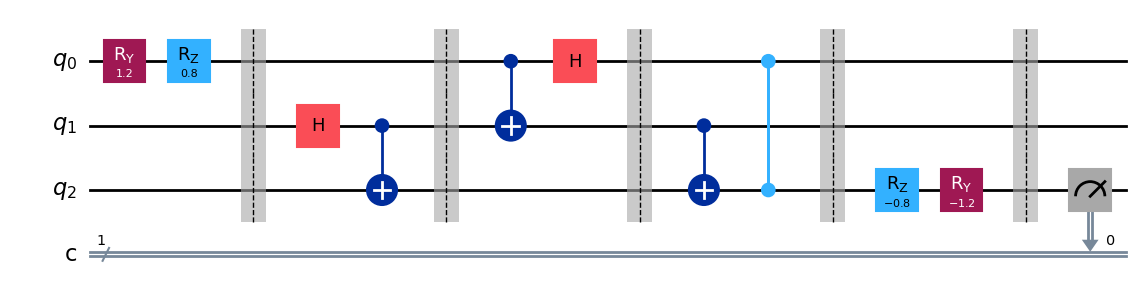

In [33]:
qc.draw('mpl')

### Run Simulation

Measurement results (Bob's qubit): {'0': 5000}


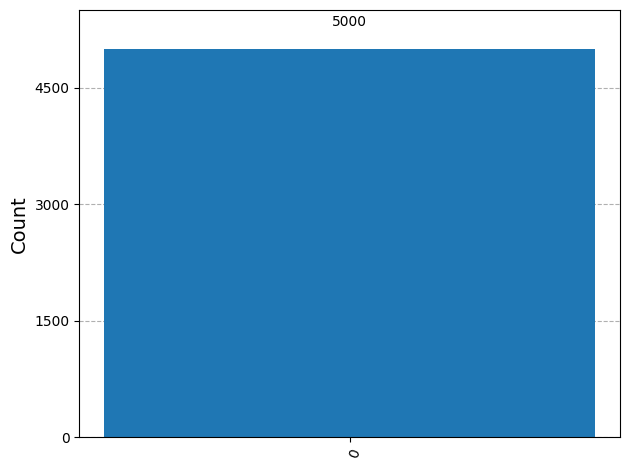

In [34]:
# Run the simulator
sim = AerSimulator()
job = sim.run(qc, shots=5000)
result = job.result()
counts = result.get_counts()

print("Measurement results (Bob's qubit):", counts)
plot_histogram(counts)

### Verification of Teleportation

Prepared the state:

$$
|\psi\rangle = U\,|0\rangle
$$

After teleportation, Bob’s qubit becomes $|\psi\rangle$.

Applying the inverse operation:

$$
U^\dagger |\psi\rangle = U^\dagger U\,|0\rangle = |0\rangle
$$

Since Bob measures $|0\rangle$ with probability $\approx 1$, this confirms that teleportation was successful.